/media/shivraj/OS/Users/Stev3raj/Desktop/Programs/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1746551917.195826   19157 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746551917.200681   19157 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Test MAE: 21.11


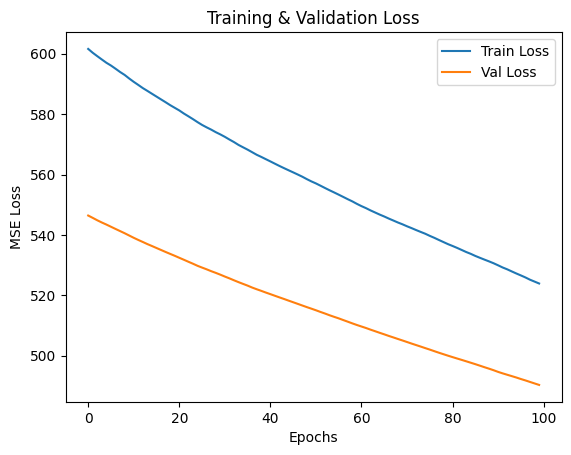

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Boston housing data
# boston = load_boston()
# X = boston.data
# y = boston.target

boston = pd.read_csv("boston_house_prices.csv", header=1)
X = boston.drop(columns="MEDV")  # or whatever your target column is named
y = boston["MEDV"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression using a DNN-like structure (just input and one Dense layer)
model = keras.Sequential([
    layers.Dense(1, input_shape=(X_train.shape[1],))  # No activation means linear
])

# Linear Regression using a DNN-like structure (just input and one Dense layer)
model = keras.Sequential([
    layers.Dense(1, input_shape=(X_train.shape[1],))  # No activation means linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()
